In [1]:
import kagglehub

path = kagglehub.dataset_download(
    "blastchar/telco-customer-churn"
)
print(path)

/Users/sanjaysriram/Documents/ml/myenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 172k/172k [00:00<00:00, 220kB/s]

Extracting files...
/Users/sanjaysriram/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import pandas as pd 
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [43]:
print("Numerical columns:\n")  
for col in df.columns:
    if(df[col].dtype== 'int64' or df[col].dtype== 'float64'):
        print(col)

print("\nCategorical columns:\n")
for col in df.columns:
    if(df[col].dtype== 'object'):
        print(col)
        
        

Numerical columns:

SeniorCitizen
tenure
MonthlyCharges

Categorical columns:

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [45]:
df["Churn"].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [54]:
#Univariate Analysis

print(df['tenure'].describe())
print("\n")

print(df["MonthlyCharges"].describe())
print("\n")



count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64




Numerical Features

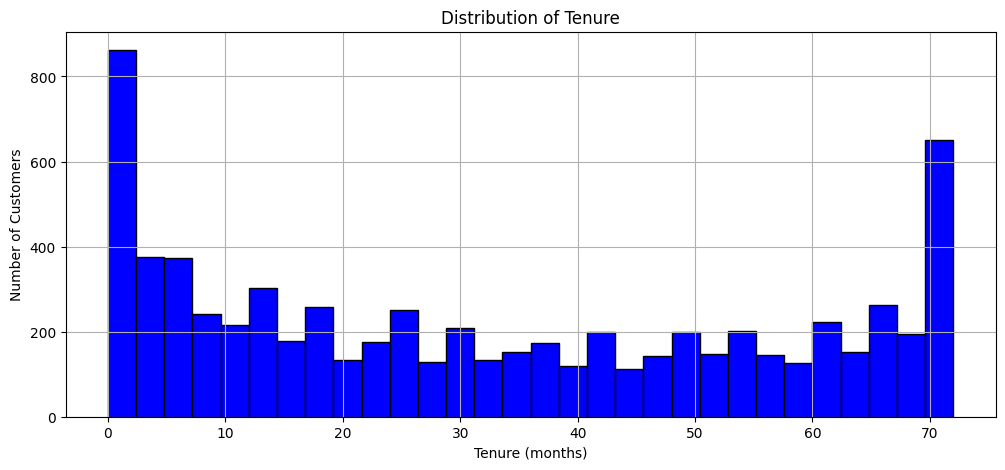

In [56]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,5))
plt.hist(df["tenure"], bins = 30, color='blue', edgecolor='black')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()


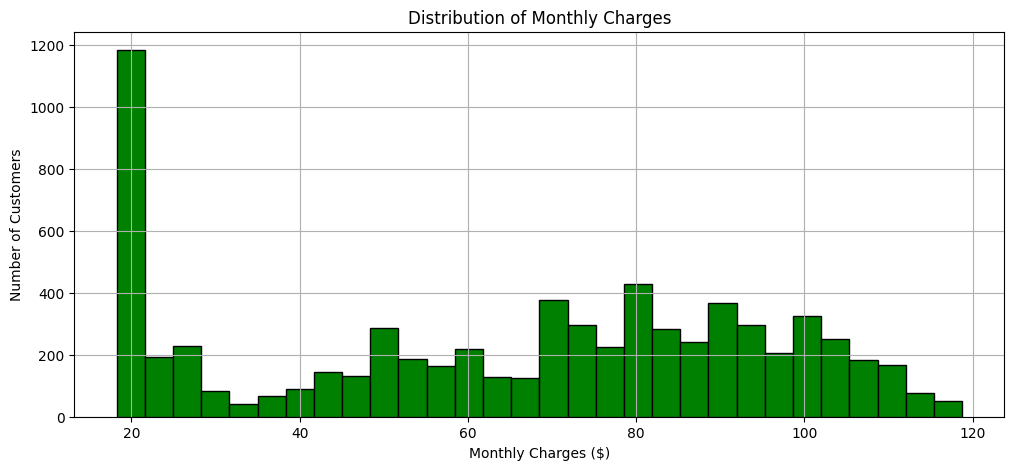

In [57]:
plt.figure(figsize=(12,5))
plt.hist(df["MonthlyCharges"], bins = 30, color='green', edgecolor='black')
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()


In [79]:
df["TotalCharges"].dtype


dtype('O')

In [78]:
df["TotalCharges"].unique().shape

(6531,)

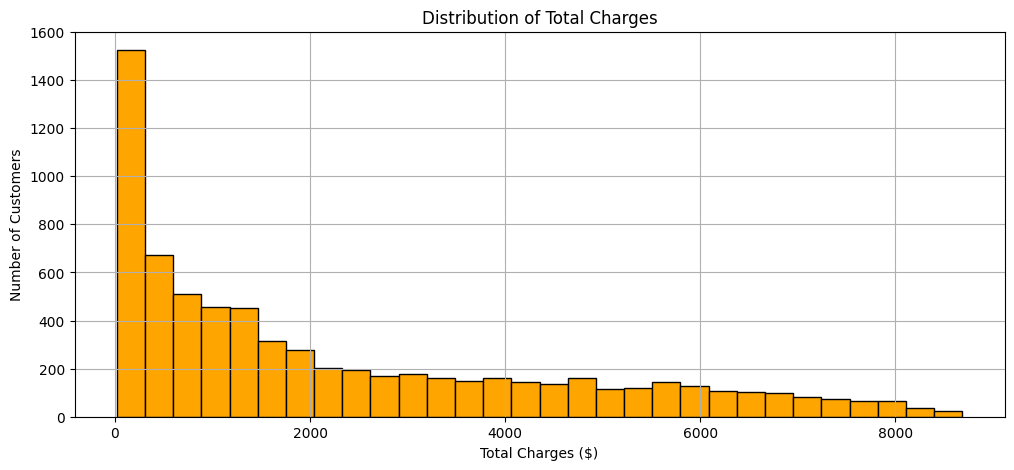

In [80]:
plt.figure(figsize=(12,5))
plt.hist(pd.to_numeric(df["TotalCharges"], errors='coerce').dropna(), bins = 30, color='orange', edgecolor='black')
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

TAKEAWAY: 
Although tenure and MonthlyCharges are numerical features, their distributions and expected relationships with churn suggest non-linear effects. In particular, the impact of tenure on churn risk is not constant across its range: customers in their initial months exhibit significantly higher churn risk, while additional months beyond long tenure contribute diminishing reductions in churn probability. Similarly, MonthlyCharges reflects discrete pricing tiers rather than a smooth linear progression, indicating threshold-based behavior where churn risk may change sharply at certain price levels. Since logistic regression assumes a linear relationship between features and the log-odds of the target, these patterns violate its constant-effect assumption. Tree-based models are better suited to capture such non-linear, piecewise relationships, while logistic regression may require feature engineering (e.g., tenure bucketing) to model these effects effectively.

The distribution of TotalCharges is heavily right-skewed, with a high concentration of customers having low accumulated charges and a long tail corresponding to long-tenure customers. This pattern is expected, as total charges are largely determined by customer tenure and monthly billing amount. No unrealistic or negative values are observed, confirming that the feature represents a valid continuous numerical variable. The strong skewness suggests that this feature reflects cumulative customer value rather than short-term behavior.Due to its strong dependence on tenure and monthly charges, TotalCharges introduces significant redundancy. For linear models, this feature will be excluded to avoid multicollinearity, while tree-based models may optionally retain it.
 


Categorical features

Categorical columns:

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn

In [60]:
df["gender"].value_counts(normalize=True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

In [61]:
df["Partner"].value_counts(normalize=True)

Partner
No     0.516967
Yes    0.483033
Name: proportion, dtype: float64

In [62]:
df["Dependents"].value_counts(normalize=True)

Dependents
No     0.700412
Yes    0.299588
Name: proportion, dtype: float64

In [63]:
df["PhoneService"].value_counts(normalize=True)

PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

In [64]:
df["MultipleLines"].value_counts(normalize=True)

MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

In [65]:
df["InternetService"].value_counts(normalize=True)

InternetService
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: proportion, dtype: float64

In [66]:
df["OnlineSecurity"].value_counts(normalize=True)

OnlineSecurity
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: proportion, dtype: float64

In [67]:
df["OnlineBackup"].value_counts(normalize=True)

OnlineBackup
No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: proportion, dtype: float64

In [68]:
df["DeviceProtection"].value_counts(normalize=True)

DeviceProtection
No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: proportion, dtype: float64

In [70]:
df["TechSupport"].value_counts(normalize=True)

TechSupport
No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: proportion, dtype: float64

In [71]:
df["StreamingTV"].value_counts(normalize=True)

StreamingTV
No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: proportion, dtype: float64

In [72]:
df["StreamingMovies"].value_counts(normalize=True)

StreamingMovies
No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: proportion, dtype: float64

In [73]:
df["Contract"].value_counts(normalize=True)

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

In [74]:
df["PaperlessBilling"].value_counts(normalize=True)

PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64

In [75]:
df["PaymentMethod"].value_counts(normalize=True)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

In [77]:
df["TotalCharges"].value_counts(normalize=True)

TotalCharges
          0.001562
20.2      0.001562
19.75     0.001278
20.05     0.001136
19.9      0.001136
            ...   
6849.4    0.000142
692.35    0.000142
130.15    0.000142
3211.9    0.000142
6844.5    0.000142
Name: proportion, Length: 6531, dtype: float64

TAKEAWAYS: The categorical features exhibit varying degrees of balance and structural dependency. Demographic variables such as gender and partner status are relatively balanced, while service-related features show clear segmentation. Notably, several add-on services contain a “No internet service” category, indicating conditional dependence on InternetService rather than independent customer choice. Contract type is heavily skewed toward month-to-month plans, which is a known strong churn indicator. These patterns suggest that tree-based models will be well-suited to capture interactions and conditional effects, while logistic regression will require careful one-hot encoding and may benefit from feature grouping.

Bivariate Analysis